# 00 IMPORTS

In [ ]:
from google.colab import drive

mount_point = '/content/gdrive'
drive.mount(mount_point)

Mounted at /content/gdrive


In [ ]:
!pip install osmnx 
!pip install -U bokeh==2.2
!pip install -q holoviews
!pip install momepy
!pip install Rtree
!pip install squarify
!pip install folium==0.12.1 mapclassify
!pip install contextily==1.0rc2
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.4 MB/s 
     |████████████████████████████████| 62 kB 614 kB/s 
     |████████████████████████████████| 1.0 MB 7.4 MB/s 
     |████████████████████████████████| 11.2 MB 14.6 MB/s 
     |████████████████████████████████| 6.3 MB 53.1 MB/s 
     |████████████████████████████████| 1.0 MB 63.4 MB/s 
     |████████████████████████████████| 16.7 MB 65.5 MB/s 
     |████████████████████████████████| 930 kB 43.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 3.9 MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.0-py3-none-any.whl size=9293544 sha256=1f8b422d145981a0ae021fbfd6cf30d3c3dbe5b049a78453d87e5cb0b4ab5845
  Stored in directory: /root/.cache/pip/wheels/8f/a2/bd/664aed36d1ed60a74f6943ca0e57234eb8fd321dfc5c526630
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.2.0 which is incompatible.
     |████████████████████████████████| 10.7 MB 4.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public

In [ ]:
import osmnx as ox 
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd
import momepy
from collections import Counter
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

from shapely.geometry import Polygon
from shapely.geometry import Point
import squarify
import folium
import contextily as cx
# Use k-means package from sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing

Output hidden; open in https://colab.research.google.com to view.

## TOKYO KOSHIGAYA CLUSTERING

In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/clustering/data/koshigaya_hex_grid_counts.geojson", "r")
koshigayaNetwork = gpd.read_file(json_file_grid)
koshigayaNetwork

,ID,apartment,commercial,house,industrial,religious,geometry
0,1,10.0,0.0,0.0,0.0,2.0,"MULTIPOLYGON (((139.58000 35.73222, 139.58333 ..."
1,2,6.0,0.0,4.0,0.0,1.0,"MULTIPOLYGON (((139.58000 35.74377, 139.58333 ..."
2,3,12.0,3.0,27.0,0.0,8.0,"MULTIPOLYGON (((139.58000 35.75532, 139.58333 ..."
3,4,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((139.58000 35.76687, 139.58333 ..."
4,5,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((139.58000 35.77841, 139.58333 ..."
...,...,...,...,...,...,...,...
1285,1286,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((140.00000 36.02090, 140.00333 ..."
1286,1287,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((140.00000 36.03245, 140.00333 ..."
1287,1288,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((140.00000 36.04399, 140.00333 ..."
1288,1289,0.0,0.0,6.0,0.0,1.0,"MULTIPOLYGON (((140.00000 36.05554, 140.00333 ..."


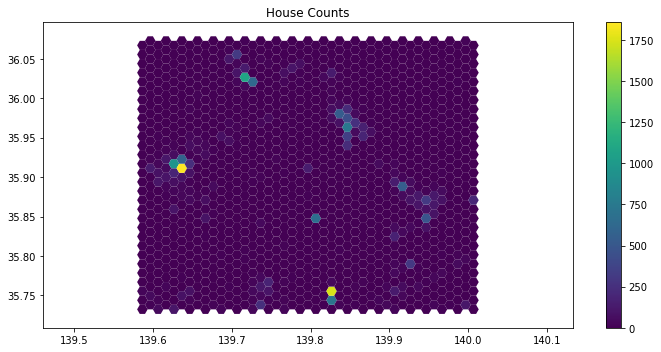

In [ ]:
# let's create some maps
fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))
koshigayaNetwork.plot(column='house', legend=True, ax=ax1)
ax1.set_title('House Counts')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

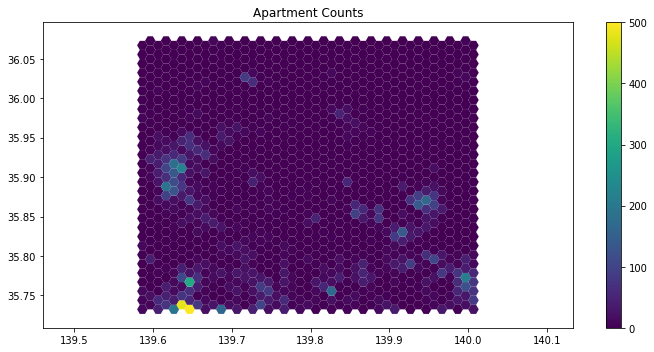

In [ ]:
# let's create some maps
fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))
koshigayaNetwork.plot(column='apartment', legend=True, ax=ax1)
ax1.set_title('Apartment Counts')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

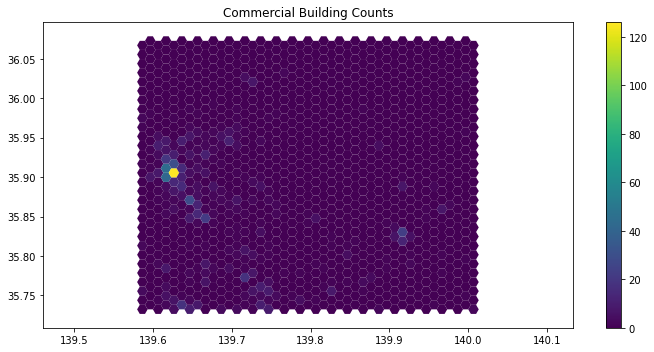

In [ ]:
# let's create some maps
fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))
koshigayaNetwork.plot(column='commercial', legend=True, ax=ax1)
ax1.set_title('Commercial Building Counts')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

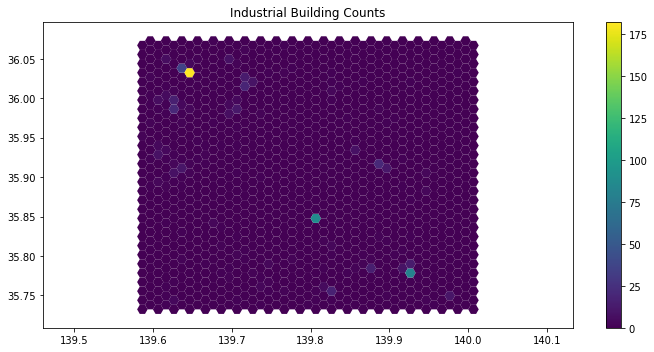

In [ ]:
# let's create some maps
fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))
koshigayaNetwork.plot(column='industrial', legend=True, ax=ax1)
ax1.set_title('Industrial Building Counts')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

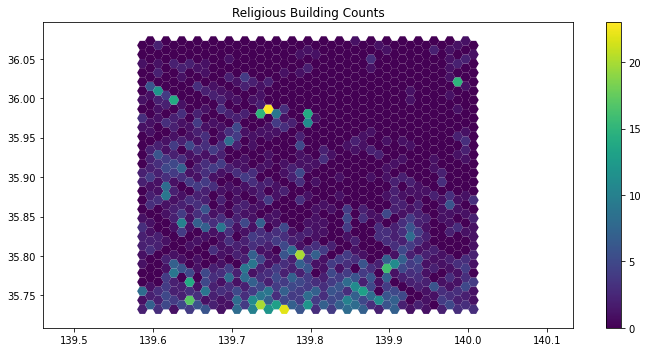

In [ ]:
# let's create some maps
fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))
koshigayaNetwork.plot(column='religious', legend=True, ax=ax1)
ax1.set_title('Religious Building Counts')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

In [ ]:
#koshigayaNetwork = koshigayaNetwork.drop(["geometry"], axis=1)

In [ ]:
#mainSampleDf = mainSampleDf[(mainSampleDf[['apartment','commercial','house','industrial','religious']] != 0).all(axis=1)]

In [ ]:
koshigayaNetwork

,ID,apartment,commercial,house,industrial,religious,geometry
0,1,10.0,0.0,0.0,0.0,2.0,"MULTIPOLYGON (((139.58000 35.73222, 139.58333 ..."
1,2,6.0,0.0,4.0,0.0,1.0,"MULTIPOLYGON (((139.58000 35.74377, 139.58333 ..."
2,3,12.0,3.0,27.0,0.0,8.0,"MULTIPOLYGON (((139.58000 35.75532, 139.58333 ..."
3,4,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((139.58000 35.76687, 139.58333 ..."
4,5,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((139.58000 35.77841, 139.58333 ..."
...,...,...,...,...,...,...,...
1285,1286,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((140.00000 36.02090, 140.00333 ..."
1286,1287,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((140.00000 36.03245, 140.00333 ..."
1287,1288,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((140.00000 36.04399, 140.00333 ..."
1288,1289,0.0,0.0,6.0,0.0,1.0,"MULTIPOLYGON (((140.00000 36.05554, 140.00333 ..."


In [ ]:
# copy the data
landusecluster_min_max_scaled = koshigayaNetwork.copy()
  
# apply normalization techniques by Column 1
for column in ['apartment', 'commercial', 'house', 'industrial', 'religious']:
  landusecluster_min_max_scaled[column] = (landusecluster_min_max_scaled[column] - landusecluster_min_max_scaled[column].min()) / (landusecluster_min_max_scaled[column].max() - landusecluster_min_max_scaled[column].min())    
  
# view normalized data
display(landusecluster_min_max_scaled)

,ID,apartment,commercial,house,industrial,religious,geometry
0,1,0.020,0.00000,0.000000,0.0,0.086957,"MULTIPOLYGON (((139.58000 35.73222, 139.58333 ..."
1,2,0.012,0.00000,0.002154,0.0,0.043478,"MULTIPOLYGON (((139.58000 35.74377, 139.58333 ..."
2,3,0.024,0.02381,0.014540,0.0,0.347826,"MULTIPOLYGON (((139.58000 35.75532, 139.58333 ..."
3,4,0.000,0.00000,0.000000,0.0,0.000000,"MULTIPOLYGON (((139.58000 35.76687, 139.58333 ..."
4,5,0.000,0.00000,0.000000,0.0,0.000000,"MULTIPOLYGON (((139.58000 35.77841, 139.58333 ..."
...,...,...,...,...,...,...,...
1285,1286,0.000,0.00000,0.000000,0.0,0.000000,"MULTIPOLYGON (((140.00000 36.02090, 140.00333 ..."
1286,1287,0.000,0.00000,0.000000,0.0,0.000000,"MULTIPOLYGON (((140.00000 36.03245, 140.00333 ..."
1287,1288,0.000,0.00000,0.000000,0.0,0.000000,"MULTIPOLYGON (((140.00000 36.04399, 140.00333 ..."
1288,1289,0.000,0.00000,0.003231,0.0,0.043478,"MULTIPOLYGON (((140.00000 36.05554, 140.00333 ..."


In [ ]:
cluster_data = koshigayaNetwork[['apartment', 'commercial', 'house','industrial', 'religious']]
cluster_data.head()

,apartment,commercial,house,industrial,religious
0,10.0,0.0,0.0,0.0,2.0
1,6.0,0.0,4.0,0.0,1.0
2,12.0,3.0,27.0,0.0,8.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


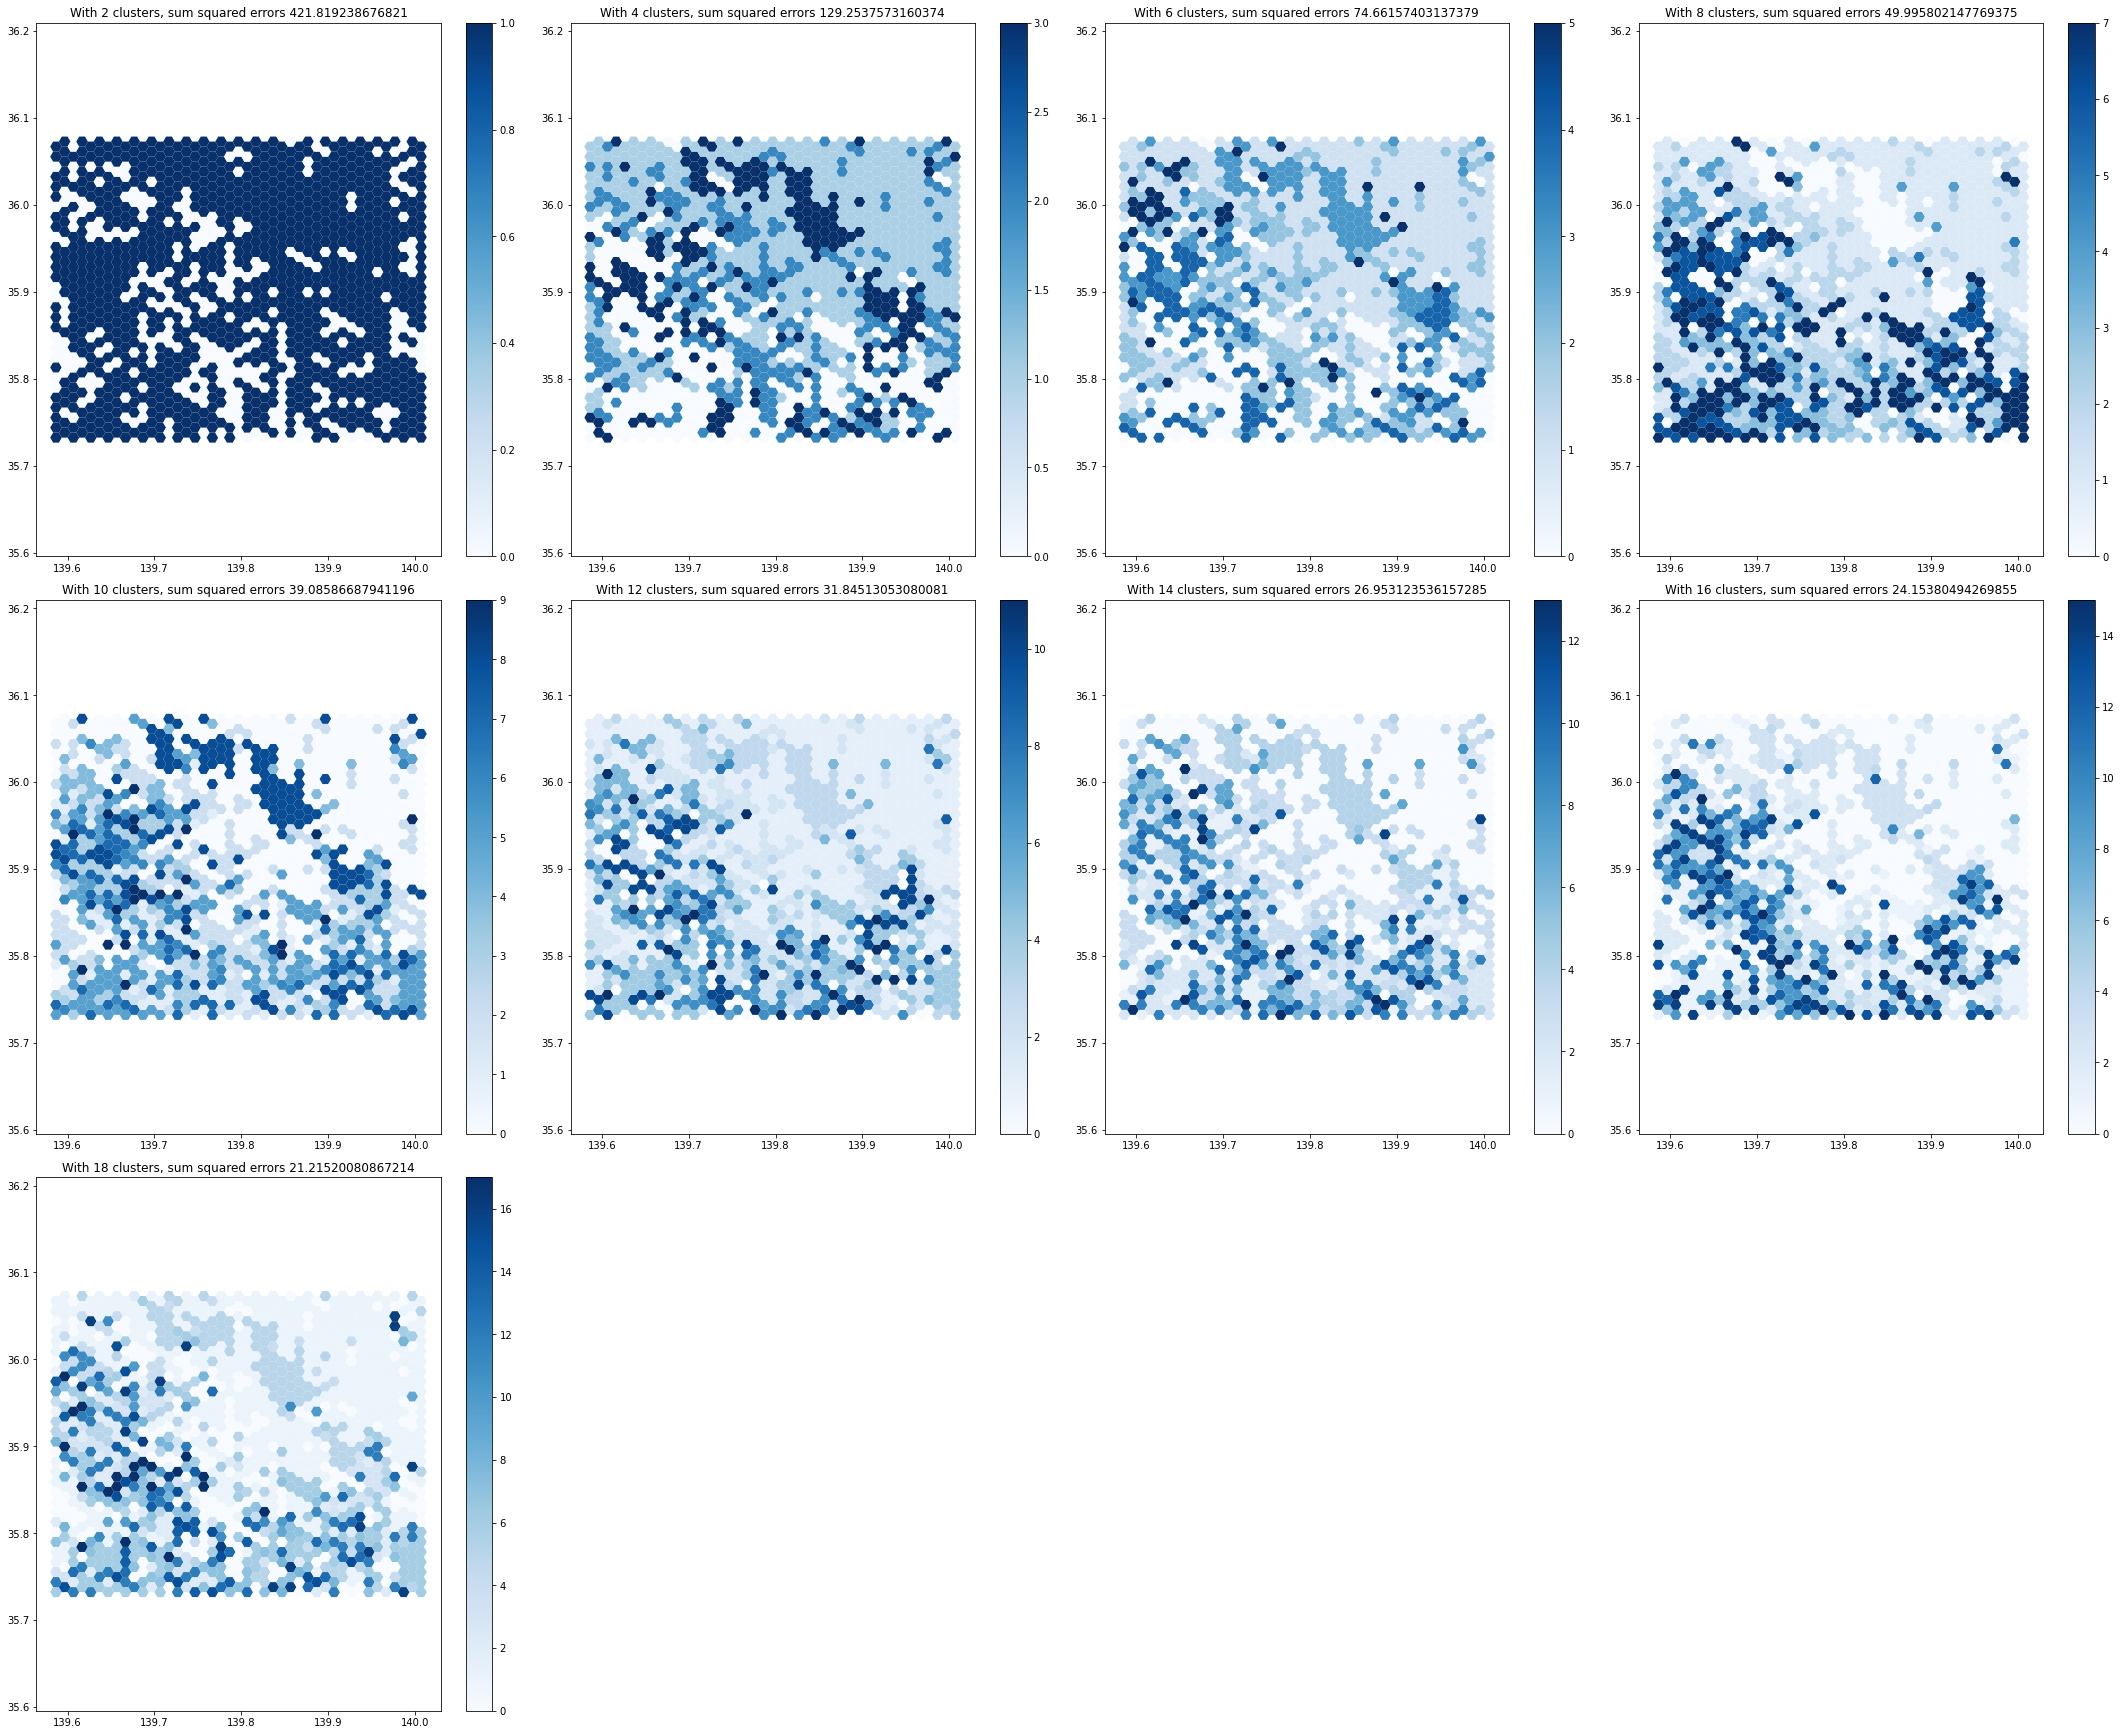

In [ ]:
plt.figure(figsize=(30,40))

ind = 0

# create dict to store scores
clusters = {
    'clusters': [],
    'score':[]
}

# normalize the data before running the model
norm_cluster_data = preprocessing.normalize(cluster_data)

for i in np.arange(2,20, 2):

    ax = plt.subplot(5,4, ind+1)
    
    ind+=1

    # run kmeans model
    
    km = KMeans(random_state=234,n_clusters=i).fit(norm_cluster_data)
    res=km.predict(norm_cluster_data)
    
    koshigayaNetwork['cluster_cat'] = res

    # create title with number of clusters and MSE ( mean squared error )
    title = f'With {i} clusters, sum squared errors {km.inertia_}'
    # plot the viz
    koshigayaNetwork.plot(column='cluster_cat', legend=True, figsize=(10,10), ax=ax, cmap='Blues')
    # set title
    ax.set_title(title)
    # aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    clusters['clusters'].append(i)
    clusters['score'].append(km.inertia_)

plt.tight_layout()
plt.show()

In [ ]:
# We can also create a function to graph and handle labels for us

def plot(x, y, ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(x, y)

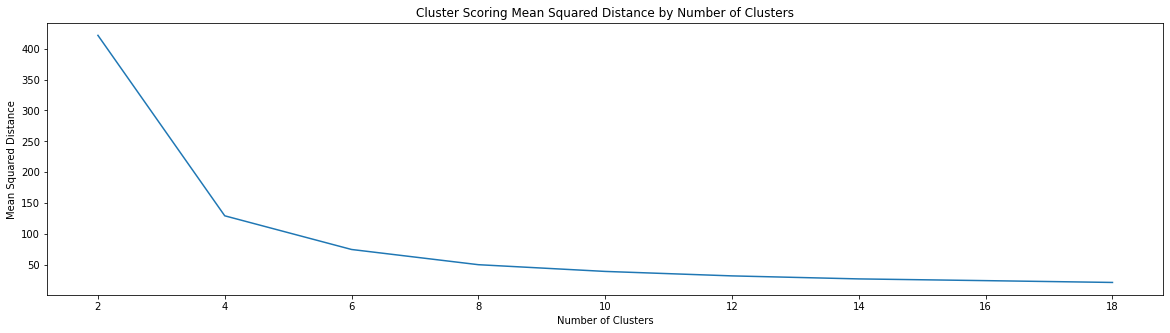

In [ ]:
cluster_scores = pd.DataFrame.from_dict(clusters, orient='index').transpose()
fig, ax = plt.subplots(figsize=(20,5))
plot(cluster_scores.clusters, cluster_scores.score, ax, 'Cluster Scoring Mean Squared Distance by Number of Clusters','Number of Clusters', 'Mean Squared Distance')

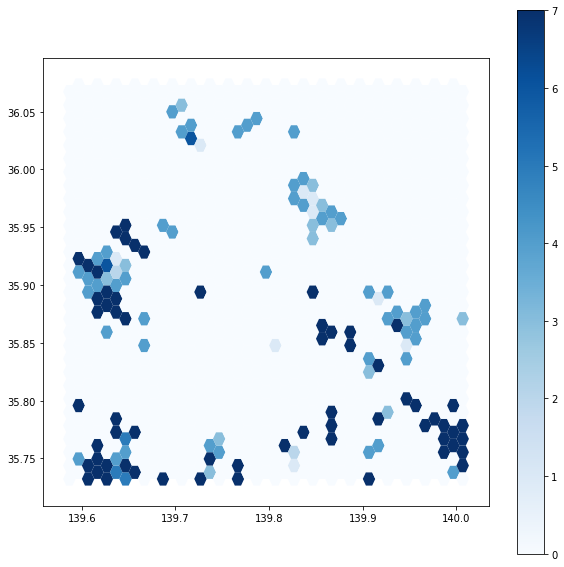

In [ ]:
optimal_number_clusters = 8

km = KMeans(random_state=234,n_clusters=optimal_number_clusters).fit(cluster_data)
res=km.predict(cluster_data)
koshigayaNetwork['cluster_cat'] = res
koshigayaNetwork.plot(column='cluster_cat', legend=True, cmap='Blues', figsize=(10,10));

In [ ]:
koshigayaNetwork

,ID,apartment,commercial,house,industrial,religious,geometry,cluster_cat
0,1,10.0,0.0,0.0,0.0,2.0,"MULTIPOLYGON (((139.58000 35.73222, 139.58333 ...",0
1,2,6.0,0.0,4.0,0.0,1.0,"MULTIPOLYGON (((139.58000 35.74377, 139.58333 ...",0
2,3,12.0,3.0,27.0,0.0,8.0,"MULTIPOLYGON (((139.58000 35.75532, 139.58333 ...",0
3,4,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((139.58000 35.76687, 139.58333 ...",0
4,5,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((139.58000 35.77841, 139.58333 ...",0
...,...,...,...,...,...,...,...,...
1285,1286,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((140.00000 36.02090, 140.00333 ...",0
1286,1287,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((140.00000 36.03245, 140.00333 ...",0
1287,1288,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((140.00000 36.04399, 140.00333 ...",0
1288,1289,0.0,0.0,6.0,0.0,1.0,"MULTIPOLYGON (((140.00000 36.05554, 140.00333 ...",0


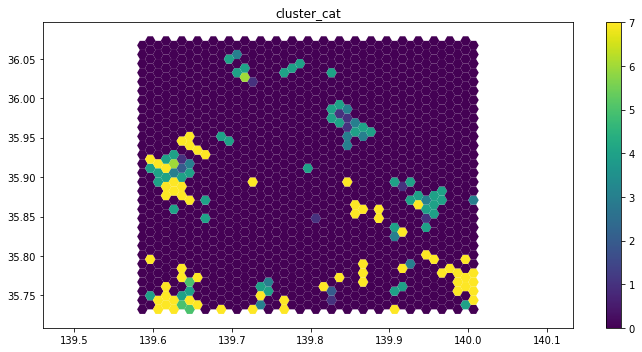

In [ ]:
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

koshigayaNetwork.plot(column='cluster_cat', legend=True, ax=ax1)
ax1.set_title('cluster_cat')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

In [ ]:
koshigayaClusterGrid = koshigayaNetwork
koshigayaClusterGrid =koshigayaClusterGrid[['geometry','cluster_cat']]
koshigayaClusterGrid

,geometry,cluster_cat
0,"MULTIPOLYGON (((139.58000 35.73222, 139.58333 ...",0
1,"MULTIPOLYGON (((139.58000 35.74377, 139.58333 ...",0
2,"MULTIPOLYGON (((139.58000 35.75532, 139.58333 ...",0
3,"MULTIPOLYGON (((139.58000 35.76687, 139.58333 ...",0
4,"MULTIPOLYGON (((139.58000 35.77841, 139.58333 ...",0
...,...,...
1285,"MULTIPOLYGON (((140.00000 36.02090, 140.00333 ...",0
1286,"MULTIPOLYGON (((140.00000 36.03245, 140.00333 ...",0
1287,"MULTIPOLYGON (((140.00000 36.04399, 140.00333 ...",0
1288,"MULTIPOLYGON (((140.00000 36.05554, 140.00333 ...",0


In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/clustering/data/koshigayaClusterGrid.geojson'
koshigayaClusterGrid.to_file(filepath_tag_geojson, driver='GeoJSON')